In [1]:
#importing the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [2]:
from google.colab import files
uploaded=files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [3]:
#loading the datasets
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
data.head(6)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995


In [4]:

data.shape

(42, 2)

In [5]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [6]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [9]:
data[data.duplicated()]

,Quarter,Sales


In [10]:
# lets separate Quarter column as Year and Quarter
data[['Quarters','Year']] = data['Quarter'].str.split(pat = '_', expand = True)
data.head(5)

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [11]:
#Getting dummy variables for Quarters
data_final=pd.get_dummies(data=data,columns=['Quarters'])

data_final

,Quarter,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
0,Q1_86,1734.827000,86,1,0,0,0
1,Q2_86,2244.960999,86,0,1,0,0
2,Q3_86,2533.804993,86,0,0,1,0
3,Q4_86,2154.962997,86,0,0,0,1
4,Q1_87,1547.818996,87,1,0,0,0
5,Q2_87,2104.411995,87,0,1,0,0
6,Q3_87,2014.362999,87,0,0,1,0
7,Q4_87,1991.746998,87,0,0,0,1
8,Q1_88,1869.049999,88,1,0,0,0
9,Q2_88,2313.631996,88,0,1,0,0


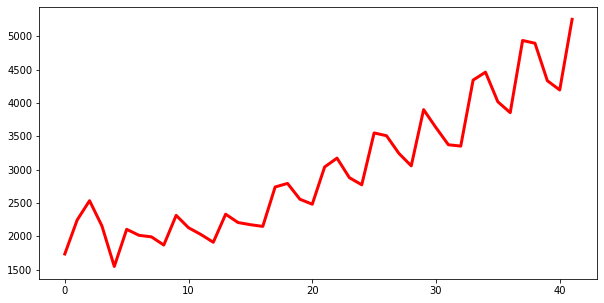

In [12]:
#Lineplot for Sales
plt.figure(figsize=(10,5))
plt.plot(data_final['Sales'], color='red',linewidth=3)

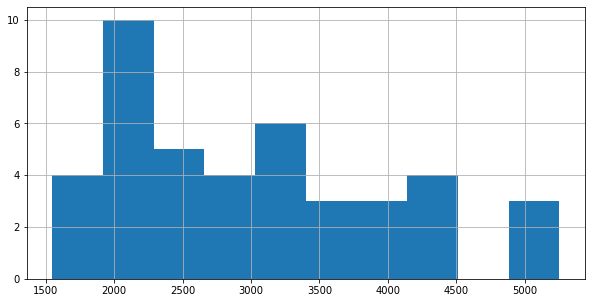

In [13]:

#Histogram
data['Sales'].hist(figsize=(10,5))

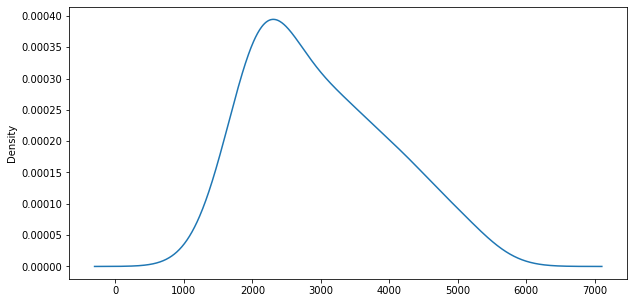

In [14]:
#density plot
data['Sales'].plot(kind='density',figsize=(10,5))

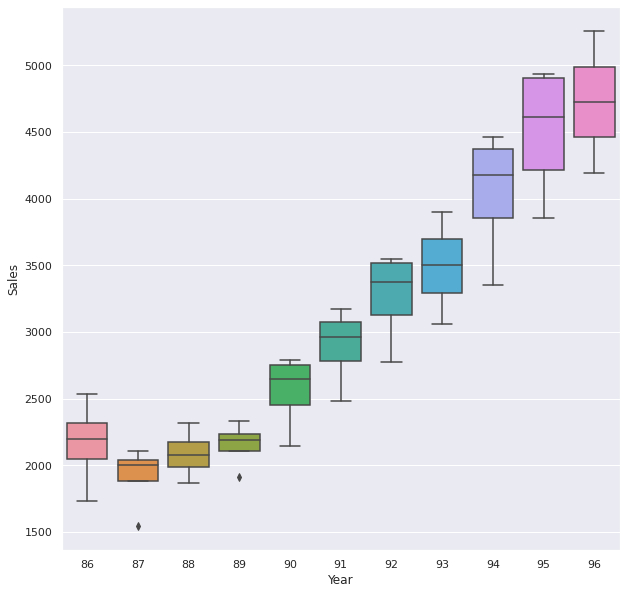

In [15]:
#Boxplot for Year vs Sales
sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(x=data_final['Year'],y=data_final['Sales'],data=data_final)

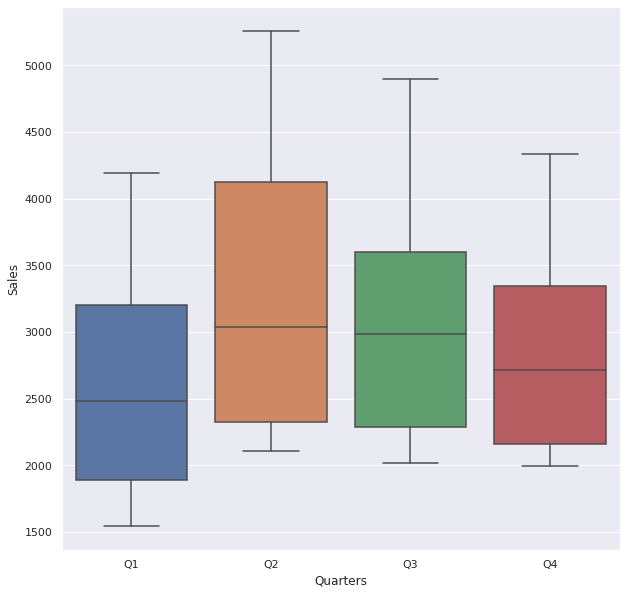

In [16]:
#Boxplot for Quarters vs Sales
sns.boxplot(x='Quarters',y='Sales',data=data)

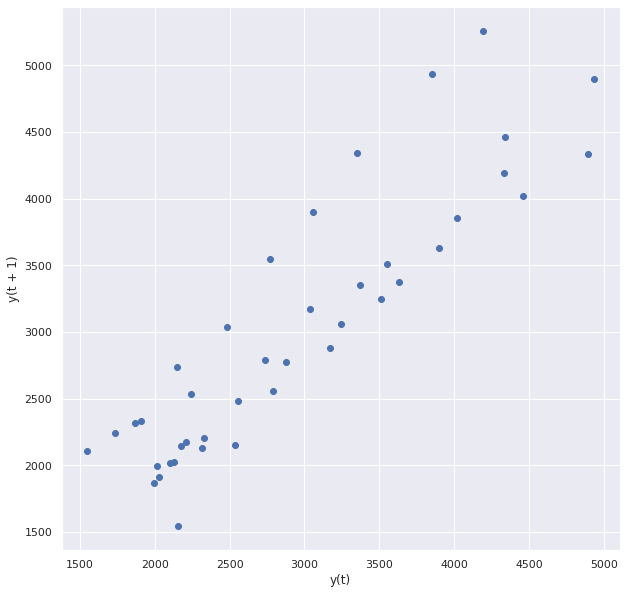

In [17]:

#Lagging plot
from pandas.plotting import lag_plot
lag_plot(data_final['Sales'])
plt.show()

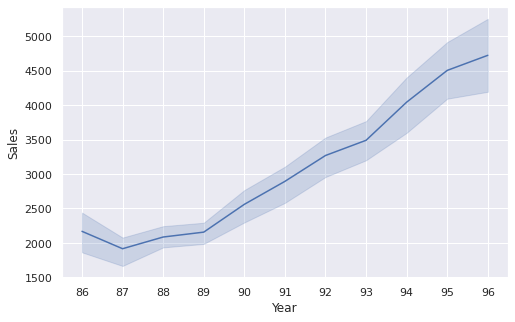

In [18]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=data_final)

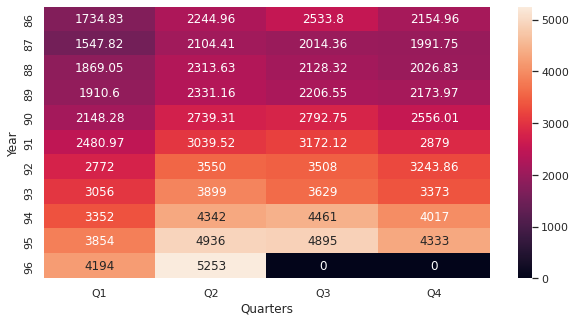

In [19]:
# heatmap to find how the sales are for each and quarter
plt.figure(figsize=(10, 5))
heatmap_y_month = pd.pivot_table(data=data,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

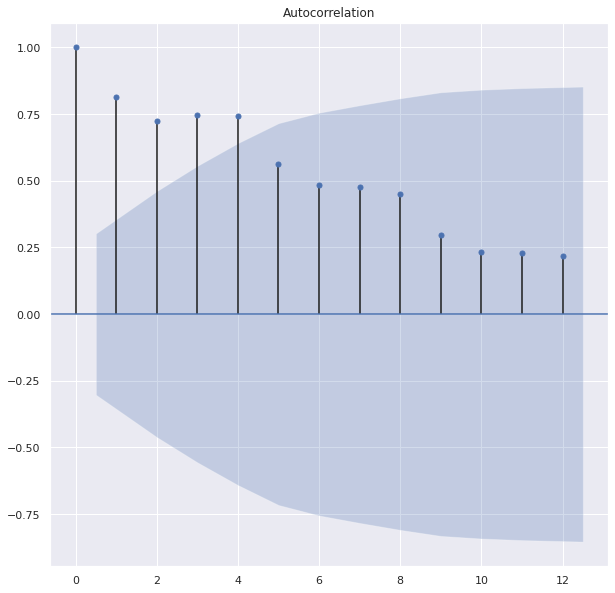

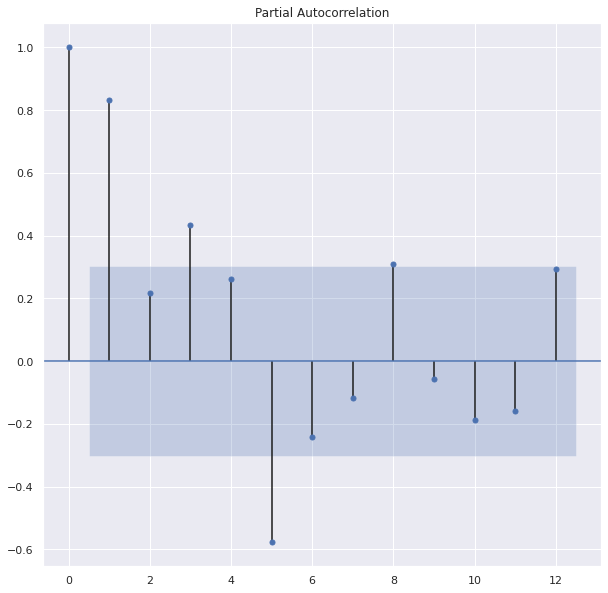

In [20]:
#Creating Auto Correlation plots

import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data_final.Sales,lags=12)
tsa_plots.plot_pacf(data_final.Sales,lags=12)
plt.show()

#Modeling Techniques and Evaluation

1) Splitting the data into the training and validation part

In [21]:
train = data_final.head(32)
test = data_final.tail(10)

#Moving Average Method

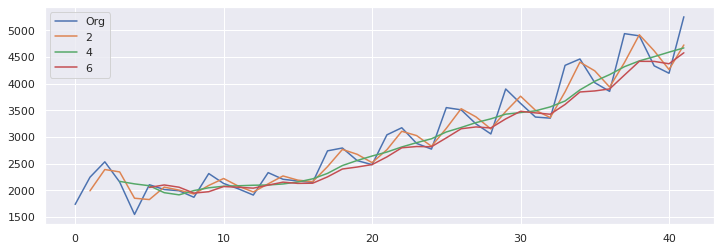

In [22]:
plt.figure(figsize=(12,4))
data_final.Sales.plot(label='Org')
for i in range(2,8,2):
    data_final['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

#Time series decomposition plot

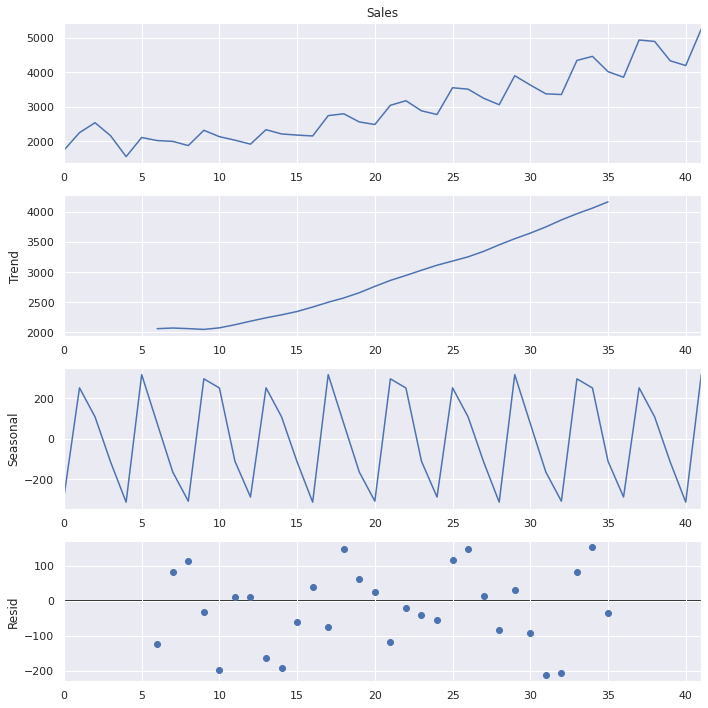

In [33]:
decompose_ts_add = seasonal_decompose(data_final.Sales,period=12)
decompose_ts_add.plot()
plt.show()

#Evaluation Metric RMSE

In [34]:
def RMSE(org,pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

#Simple Exponential Method

In [40]:
from statsmodels.tsa.api  import SimpleExpSmoothing
ses_model = SimpleExpSmoothing(train['Sales']).fit()
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
rmse_ses_model = RMSE(pred_ses,test.Sales)
rmse_ses_model

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


1034.9359056453961

#Holt method / Double Exp Method

In [42]:
from statsmodels.tsa.api  import Holt

holt_model=Holt(train["Sales"]).fit()
pred_holt = holt_model.predict(start=test.index[0],end=test.index[-1])
rmse_holt_model=RMSE(pred_holt,test.Sales)
rmse_holt_model

941.6367810616845

#Holts winter exponential smoothing with additive seasonality and additive trend

In [46]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend and seasonal to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_model_add_add=RMSE(test.Sales,pred_hwe_add_add) 
rmse_hwe_model_add_add

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


522.8405512059857

#Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [47]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
rmse_hwe_model_mul_add=RMSE(test.Sales,pred_hwe_mul_add) 
rmse_hwe_model_mul_add


387.0530909094325

#Model based Forecasting Methods

In [48]:
# Data preprocessing for models
data_final["t"] = np.arange(1,43)
data_final["t_squared"] = data_final["t"]*data_final["t"]

data_final["log_sales"]=np.log(data_final["Sales"])
data_final.head()

,Quarter,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,87,1,0,0,0,5,25,7.344602


#Splitting the data

In [49]:
train_data = data_final.head(32)
test_data = data_final.tail(10)

#Linear Model

In [50]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Sales~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear_model=RMSE(test_data['Sales'],pred_linear)
rmse_linear_model

752.9233932767116

#Exponential Model

In [51]:
Exp = smf.ols('log_sales~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Exp=RMSE(test_data['Sales'],np.exp(pred_Exp))
rmse_Exp

590.3316432076487

#Quadratic model

In [52]:
##### Quadratic Model
Quad = smf.ols('Sales~t+t_squared',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(pd.DataFrame(test_data[["t","t_squared"]])))
rmse_Quad=RMSE(test_data['Sales'],pred_Quad)
rmse_Quad

457.735735540752

#Additive Seasonality

In [53]:
#Additive seasonality 
add_sea = smf.ols('Sales~Quarters_Q1+Quarters_Q2+Quarters_Q3',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Quarters_Q1', 'Quarters_Q2', 'Quarters_Q3']]))
rmse_add_sea = RMSE(test_data['Sales'],pred_add_sea )
rmse_add_sea

1850.4665461858358

#Additive Seasonality Quadratic

In [54]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Sales ~ t+t_squared+Quarters_Q1+Quarters_Q2+Quarters_Q3',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Quarters_Q1', 'Quarters_Q2', 'Quarters_Q3','t','t_squared']]))
rmse_add_sea_quad = RMSE(test_data['Sales'], pred_add_sea_quad)
rmse_add_sea_quad

277.35107711286423

#Multiplicative Seasonality model

In [55]:
Mul_sea = smf.ols('log_sales~Quarters_Q1+Quarters_Q2+Quarters_Q3',data=train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mul_sea = RMSE(test_data['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1908.2503948361166

#Multiplicative Additive Seasonality model

In [56]:
Mul_Add_sea = smf.ols('log_sales~t+Quarters_Q1+Quarters_Q2+Quarters_Q3',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test_data))
rmse_Mul_Add_sea = RMSE(test_data['Sales'], np.exp(pred_Mult_add_sea))
rmse_Mul_Add_sea

448.86781826918514

In [57]:
#Compare the results
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_holt_model],
          ['holt exp smoothing add',rmse_hwe_model_add_add],['holt exp smoothing mult',rmse_hwe_model_mul_add],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp],['Quad model',rmse_Quad],
          ['add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_quad],
          ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_Add_sea]]


score = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
score

,Model,RMSE_Value
0,Simple Exponential Method,1034.935906
1,Holt method,941.636781
2,holt exp smoothing add,522.840551
3,holt exp smoothing mult,387.053091
4,Linear Mode,752.923393
5,Exp model,590.331643
6,Quad model,457.735736
7,add seasonality,1850.466546
8,Quad add seasonality,277.351077
9,Mult Seasonality,1908.250395


#We can see that, we are getting lowest RMSE value for the Additive Seasonality Quadratic model

In [58]:
list_model_driven = [['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp],['Quad model',rmse_Quad],
          ['add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_quad],
          ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_Add_sea]]
score = pd.DataFrame(list_model_driven, columns =['Model Driven Model', 'RMSE_Value']) 
score

,Model Driven Model,RMSE_Value
0,Linear Mode,752.923393
1,Exp model,590.331643
2,Quad model,457.735736
3,add seasonality,1850.466546
4,Quad add seasonality,277.351077
5,Mult Seasonality,1908.250395
6,Mult add seasonality,448.867818


#Building final model with least RMSE value - Quad add seasonality Model

In [59]:
data_final.head(6)

,Quarter,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,87,0,1,0,0,6,36,7.651791


In [60]:
final_model = smf.ols('Sales~t+t_squared+Quarters_Q1+Quarters_Q2+Quarters_Q3',data=data_final).fit()
pred_final = pd.Series(final_model.predict(data_final[['Quarters_Q1','Quarters_Q2','Quarters_Q3','t','t_squared']]))
rmse_final_model = RMSE(data_final['Sales'], pred_final)
rmse_final_model

159.05522576522478

In [61]:

pred_df = pd.DataFrame({'Actual' : data_final.Sales, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


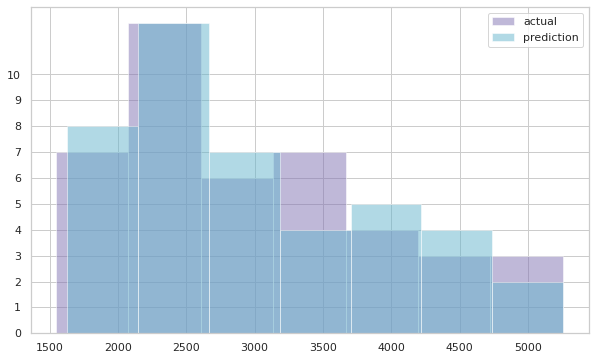

In [62]:
# Actual Vs Predicted graph
sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (10, 6)
_, ax = plt.subplots()
ax.hist(data_final.Sales, color = 'm', alpha = 0.5, label='actual',bins=7)
ax.hist(pred_final, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc='best')
plt.show()

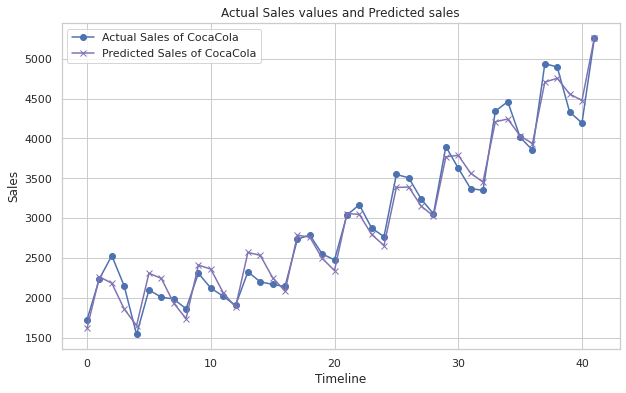

In [63]:
#Plot of Actual Sales values and predicted values
plt.plot(data_final.Sales, color='b',marker='o',label='Actual Sales of CocaCola')
plt.plot(pred_final, color='m',marker='x', label='Predicted Sales of CocaCola')

#Added titles and adjust dimesnions
plt.title('Actual Sales values and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize'] =(10,5)

plt.show()